In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Salary_Data.csv')

In [16]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Text(0, 0.5, 'Salary')

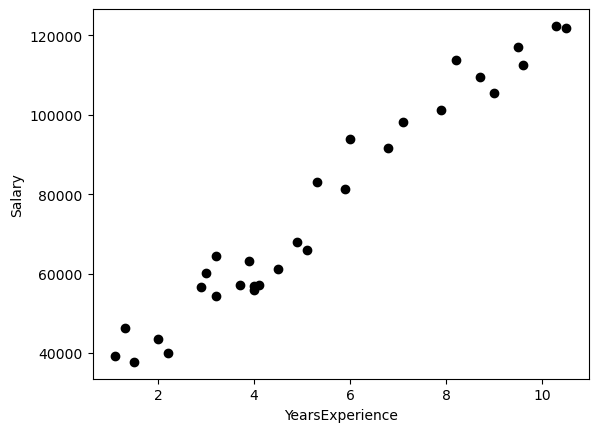

In [6]:
plt.scatter(df['YearsExperience'],df['Salary'],color = 'black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [10]:
x = df.iloc[:,:-1].values
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [12]:
y = df.iloc[:,-1]
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [13]:
x.shape

(30, 1)

In [14]:
y.shape

(30,)

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [26]:
x_train

array([[ 8.2],
       [ 3. ],
       [ 2. ],
       [ 6.8],
       [ 2.9],
       [ 9.6],
       [ 4. ],
       [ 2.2],
       [ 3.9],
       [ 5.1],
       [10.3],
       [ 9. ],
       [ 5.3],
       [ 1.5],
       [ 3.2],
       [ 9.5],
       [ 8.7],
       [ 5.9],
       [ 4. ],
       [ 7.9],
       [10.5],
       [ 4.1],
       [ 4.9],
       [ 3.2]])

In [27]:
x_test

array([[1.3],
       [1.1],
       [4.5],
       [3.7],
       [7.1],
       [6. ]])

In [28]:
y_train

23    113812.0
6      60150.0
3      43525.0
20     91738.0
5      56642.0
27    112635.0
12     56957.0
4      39891.0
10     63218.0
16     66029.0
28    122391.0
25    105582.0
17     83088.0
2      37731.0
7      54445.0
26    116969.0
24    109431.0
18     81363.0
11     55794.0
22    101302.0
29    121872.0
13     57081.0
15     67938.0
8      64445.0
Name: Salary, dtype: float64

In [36]:
y_test

1     46205.0
0     39343.0
14    61111.0
9     57189.0
21    98273.0
19    93940.0
Name: Salary, dtype: float64

In [29]:
lr.fit(x,y)

LinearRegression()

In [34]:
y_pred = lr.predict(x_test)

In [35]:
y_pred

array([38077.15121656, 36187.15875227, 68317.03064522, 60757.06078805,
       92886.932681  , 82491.9741274 ])

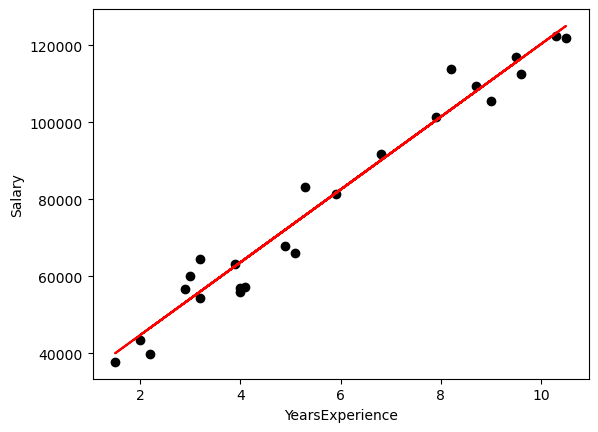

In [47]:
plt.scatter(x_train,y_train,color = 'black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.plot(x_train,lr.predict(x_train),color= 'red')

In [49]:
lr.predict([[12]])

array([139191.74805613])

In [55]:
def salary():
  e = float(input("Enter the experience :"))
  return lr.predict([[e]])

In [56]:
salary()

Enter the experience :12


array([139191.74805613])

In [61]:
from sklearn.metrics import r2_score

In [62]:
r2_score(y_test,y_pred)

0.900617980434455

In [66]:
from sklearn.model_selection import cross_val_score

a = cross_val_score(LinearRegression(),x,y,cv = 5)

In [67]:
a

array([ 0.3595933 , -1.24422823,  0.25052696,  0.29699762,  0.07028896])

In [68]:
a.mean()

-0.053364276845097036

In [71]:
for i in range(1,10):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    p = lr.predict(x_test)
    print(r2_score(y_test,p))

0.7616681465472094
0.8886956733784562
0.9695039421049821
0.9504404484884268
0.9439628569611375
0.9368146227107088
0.8143022783109007
0.9631182154839476
0.9388416537799072


In [72]:
import joblib

In [76]:
joblib.dump(lr,'salary.pkl')

['salary.pkl']

In [77]:
model = joblib.load('salary.pkl')

model.predict([[10]])

array([118985.49455846])